In [1]:
import numpy as np
import codecs
import matplotlib.pyplot as plt

XDIM=256
YDIM=249

with codecs.open('/mnt/d/DATA/XFMDATA/2023/Lachlan/REFERENCE/IXRF_block_230120/repeat2/PXVALS/dt.txt') as fdt:
    dt = np.genfromtxt(fdt, delimiter=',')

with codecs.open('/mnt/d/DATA/XFMDATA/2023/Lachlan/REFERENCE/IXRF_block_230120/repeat2/PXVALS/sum.txt') as fsum:
    sum = np.genfromtxt(fsum, delimiter=',')




In [2]:
print(dt.shape)
print(sum.shape)

(2, 63744)
(2, 63744)


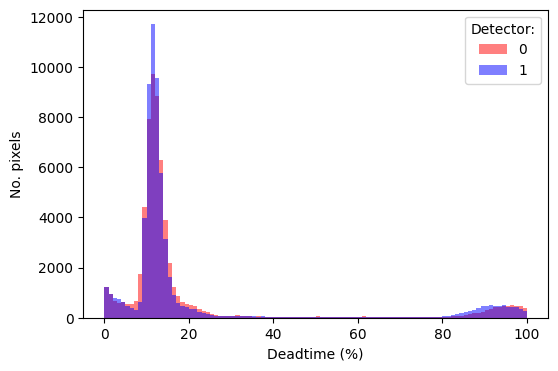

In [91]:
fig = plt.figure(figsize=(6,4))

ax = fig.add_subplot(111)

ax.set_xlabel("Deadtime (%)")
ax.set_ylabel("No. pixels")

ax.hist(dt[0], 100, fc=(1,0,0,0.5), label="0")
ax.hist(dt[1], 100, fc=(0,0,1,0.5), label="1")

ax.legend(loc=1, title="Detector:")

plt.show()

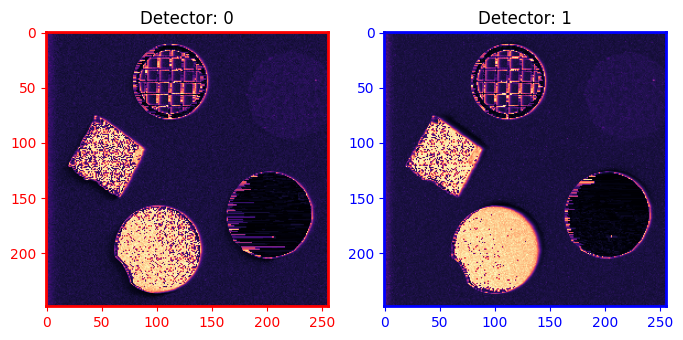

In [90]:
fig = plt.figure(figsize=(8,4))

ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)


ax0.set_title("Detector: 0")
ax0.tick_params(axis='x',colors='red')
ax0.tick_params(axis='y',colors='red')
for spine in ax0.spines.values():
    spine.set_linewidth(2)
    spine.set_color('red')

ax1.set_title("Detector: 1")
ax1.tick_params(axis='x',colors='blue')
ax1.tick_params(axis='y',colors='blue')
for spine in ax1.spines.values():
    spine.set_linewidth(2)
    spine.set_color('blue')

dtimage0 = dt[0].reshape(YDIM,XDIM)
dtimage1 = dt[1].reshape(YDIM,XDIM)

ax0.imshow(dtimage0, cmap="magma")
ax1.imshow(dtimage1, cmap="magma")

plt.show()

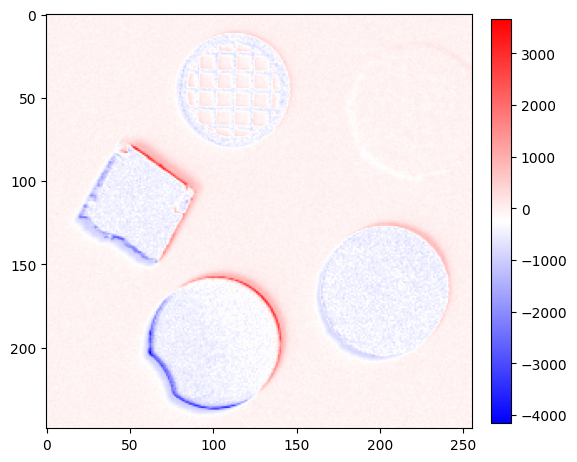

In [104]:
diffmap = sum[0]-sum[1]

diffimage = diffmap.reshape(YDIM,XDIM)

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111)

img = ax.imshow(diffimage, cmap='bwr')

plt.colorbar(img, fraction=0.04346, pad=0.04)


/home/lachlan/.pyenv/versions/venv_readoutxfm/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


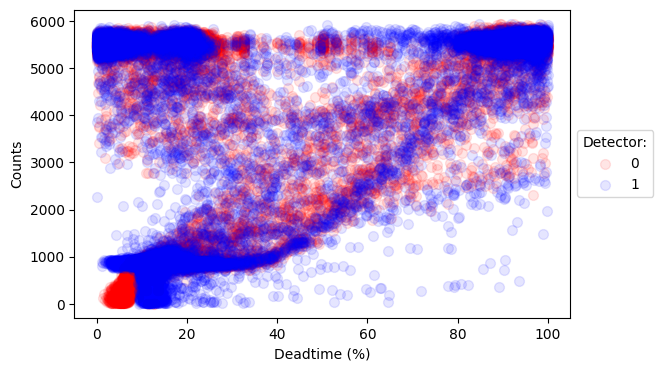

In [69]:
fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(111)
ax.set_xlabel("Deadtime (%)")
ax.set_ylabel("Counts")

ax.scatter(dt[0],sum[0], color="red", marker='o', s=50, alpha=0.1, linewidths=None, label="0")
ax.scatter(dt[1],sum[0], color="blue", marker='o', s=50, alpha=0.1, linewidths=None, label="1")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(bbox_to_anchor=(1, 0.5), loc="center left", title="Detector:")
#NB: works but not sure why... box appears to right
#from: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

fig.show()